# Medical Cost Personal Insurance Project

In [1]:
# # importing necessary library 
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

# Data Collection & Analysis 

In [2]:
# loading data from csv file to a Pandas Datafrem
insurances=pd.read_csv("Medical")

In [3]:
# firts 5 rows of the dataframe 
insurances.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# number of rows and columns 
insurances.shape

(1338, 7)

In [5]:
# getting some information about the dataset
insurances.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
#Categorical Feature:
   # 1 Sex 
   #2 Smoker
    #3 Region 

In [8]:
# checking for missing values
insurances.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# Data analysis 

In [9]:
# Statistical Meansures of the dataset
insurances.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Text(0.5, 1.0, 'Age distribution ')

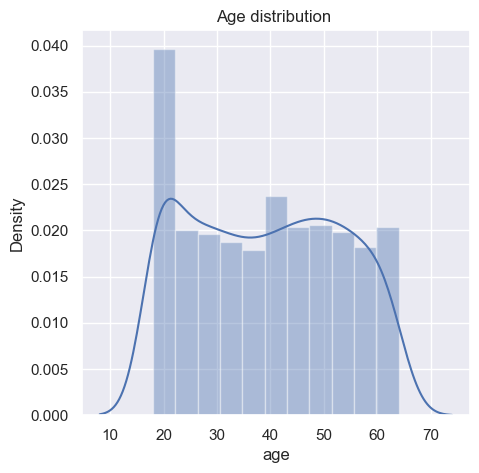

In [10]:
# the distribution of age value
sns.set()
plt.figure(figsize=(5,5))
sns.distplot(insurances["age"])
plt.title("Age distribution ")

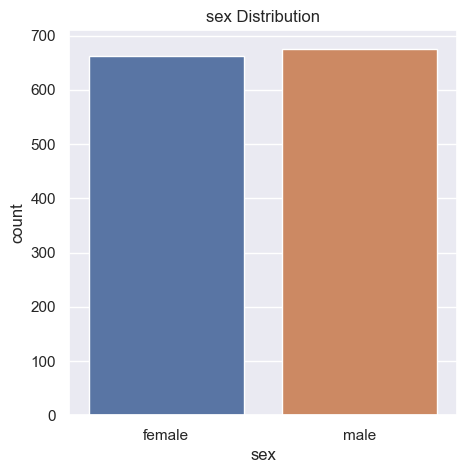

In [11]:
# gender column 
plt.figure(figsize=(5,5))
sns.countplot(x='sex', data=insurances)
plt.title('sex Distribution')
plt.show()

In [12]:
insurances['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

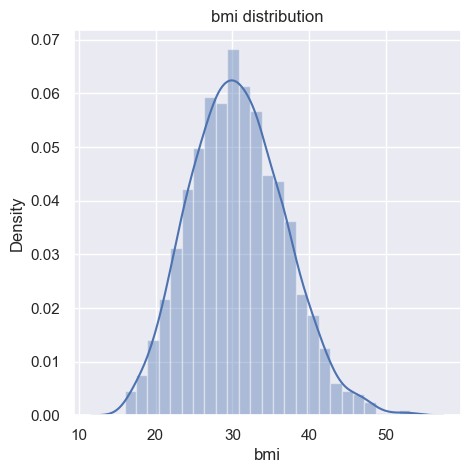

In [13]:
sns.set()
plt.figure(figsize=(5,5))
sns.distplot(insurances["bmi"])
plt.title("bmi distribution")
plt.show()

Normal BIM Range --> 18.5 to 24.9

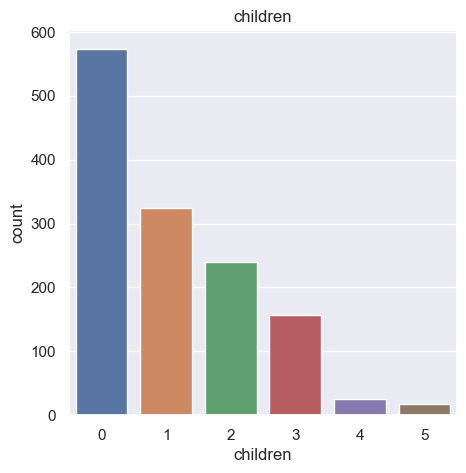

In [14]:
# children columns 
plt.figure(figsize=(5,5))
sns.countplot(x='children', data=insurances)
plt.title('children')
plt.show()

In [15]:
insurances['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

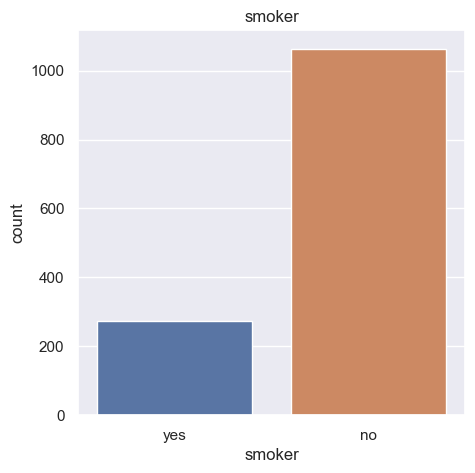

In [16]:
# smoker columns 
plt.figure(figsize=(5,5))
sns.countplot(x='smoker', data=insurances)
plt.title('smoker')
plt.show()

In [17]:
insurances['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

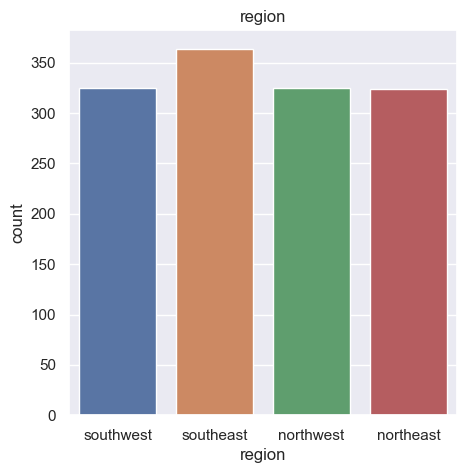

In [18]:
# region columns 
plt.figure(figsize=(5,5))
sns.countplot(x='region', data=insurances)
plt.title('region')
plt.show()

In [19]:
insurances['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

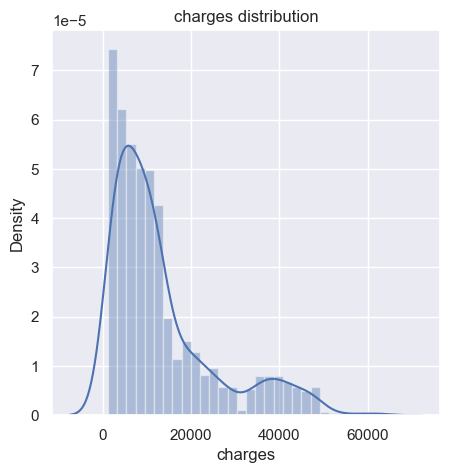

In [20]:
# the charges distribution of age value
sns.set()
plt.figure(figsize=(5,5))
sns.distplot(insurances["charges"])
plt.title("charges distribution")
plt.show()

In [21]:
insurances['charges'].value_counts()

charges
1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455    1
              ..
7345.08400     1
26109.32905    1
28287.89766    1
1149.39590     1
29141.36030    1
Name: count, Length: 1337, dtype: int64

# Data Pre Process 

In [22]:
#Encoding the categorical feature

In [23]:
# Encoding sex column 
insurances.replace({'sex': {'male': 0, 'female': 1}}, inplace=True)

# Encoding smoker column 
insurances.replace({'smoker': {'yes': 0, 'no': 1}}, inplace=True)

# Encoding region column 
insurances.replace({'region':{'southeast':0, 'southwest':1, 'northeast':2, 'northwest':3}}, inplace=True)

# Splitting the Feature and Targe

In [24]:
x = insurances.drop(columns='charges', axis=1)
y = insurances['charges']

In [25]:
print(x)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [26]:
print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [27]:
#splitting the Data into traning data & Testing Data

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [28]:
print(x.shape, x_train.shape, x_test.shape)

(1338, 6) (1070, 6) (268, 6)


# Model Training

In [29]:
# loading the Linear Regression model
regressor = LinearRegression()

In [30]:
regressor.fit(x_train, y_train)

LinearRegression()

# Model Evaluation 

In [31]:
# prediction on traning data 
training_data_prediction = regressor.predict(x_train)

In [32]:
# R squred value
r2_train = metrics.r2_score(y_train, training_data_prediction)
print("R squred value :", r2_train)

R squred value : 0.751505643411174


In [33]:
# prediction on test data 
test_data_prediction = regressor.predict(x_test)

In [34]:
# R squred value
r2_test = metrics.r2_score(y_test, test_data_prediction)
print("R squred value :", r2_test)

R squred value : 0.7447273869684077


# Building a Predictive System

In [38]:
input_data = (31,1,25.74,0,1,0)

# charging input_data to a numpy array 
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# make predictions
prediction = regressor.predict(input_data_reshaped)
print(prediction)

[3760.0805765]
